201810824 현소미 기말고사

In [0]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_samples = 100,

                            n_features = 4,

                            n_informative = 3,

                            n_targets = 1,

                            noise = 0.0,

                            coef = True)

1-1 못풀었습니다

1-2 답spark dataframe 생성

In [0]:
import pandas as pd
import pyspark
df1=pd.DataFrame(X, columns=['features1','features2','features3','features4'])
df2=pd.DataFrame(y, columns=['result'])
result3 = pd.concat([df1,df2],axis=1)
df=spark.createDataFrame(result3)

1-3-1, 1-3-2 못풀었습니다

1-4-(1) 답:  훈련데이터, 테스트 데이터 분리

In [0]:
(trainDf, testDf) = df.randomSplit([0.6, 0.4])

In [0]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline

va = VectorAssembler(inputCols = ['features1','features2','features3','features4'],
                                   outputCol = 'features')
lr = LinearRegression(featuresCol = 'features', labelCol='result', maxIter=10, regParam=0.3, elasticNetParam=0.8)

pipeline = Pipeline(stages=[ va, lr])
model = pipeline.fit(trainDf)
modelTrainDf = model.transform(trainDf)

1-4-(2) 답: 계수, 절편 출력

In [0]:
print("Coefficients: "+str(model.stages[-1].coefficients))
print("Intercept: "+str(model.stages[-1].intercept))

Coefficients: [21.347899885968037,44.73155295207907,40.74402625780978,0.0]
Intercept: -0.0023238088612313767

In [0]:
modelTestDf=model.transform(testDf)
from pyspark.ml.evaluation import RegressionEvaluator

evaluator=RegressionEvaluator(labelCol="result", predictionCol="prediction", metricName="rmse")
rmse=evaluator.evaluate(modelTestDf)

1-5 답 : 정확성 출력

In [0]:
f"Root Mean Squared Error (RMSE) on test data: {rmse:.3f}"

Out[86]: 'Root Mean Squared Error (RMSE) on test data: 0.506'

2

In [0]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, centers=5, cluster_std=0.50, random_state=0)

In [0]:
def normDist(x1, x2):
    #dist=np.sqrt(sum(np.power(x1 - x2, 2))) #36.406001444695193
    dist = np.linalg.norm(x1 - x2) #36.406001444695193
    return dist
def draw(x, centroids):
    import matplotlib.pyplot as plt
    #plt.subplot(5,2,iter)
    plt.scatter(x[:,0], x[:,1], color='blue')
    plt.scatter(centroids[:,0], centroids[:,1], color='red')


In [0]:
def cluster(x, k, centroids):
    import matplotlib.pyplot as plt
    row, col = x.shape
    clusterAssigned = np.zeros(shape=(row, 2), dtype=float)
    
    clusterUpdated=True
    iter = 1
    while(clusterUpdated):
        print ("\n\n====== Iteration {} ======".format(iter))
        
        plt.scatter(x[:,0], x[:,1], color='blue')
        plt.scatter(centroids[:,0], centroids[:,1], color='red')
        # STEP 1: assign to closer cluster
        for i in range(row):
            minDist = np.inf   # set arbitray max to minDist
            minIndex = -1      # set arbitray index to minIndex
            # compute distance and assign to closer cluster
            for j in range(k):
                # distance from centroids[j] to x[0]
                distJI = normDist(centroids[j], x[i])
                # print ("Distance {:.3f} between {} and {}".format(distJI, centroids[j], x[i]))
                # pick the closest centroid
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
#             print (".....Assigning {} to {}th centroid by {:.3f}".format(x[i], minIndex, minDist))
            clusterAssigned[i] = [minIndex, minDist]   #-----changed
#         print ("\n.....Assigned clusters: \n {}".format(clusterAssigned))
        # STEP 2: update centroids
        _centroids=np.zeros(shape = (k, x.shape[1]), dtype=float)
        for cent in range(k):
            # read data by index and average them
            _centroids[cent] = np.mean(x[clusterAssigned[:,0]==cent],axis=0)
        # print ("Centroids updated: \n", _centroids)
        # STEP 3: see if centroids is updated. STOP if NOT updated
        comparison = np.equal(centroids, _centroids) # np.isclose() in case some tolerence is required
        if(comparison.all() == True):
            print ("\n.....NOT Updating Centroids\n {} => \n{}".format(centroids, _centroids))
            clusterUpdated = False
            return centroids, clusterAssigned
        else:
            print ("\n.....Updating Centroids\n {} => \n{}".format(centroids, _centroids))
            centroids = _centroids
            iter += 1
            

In [0]:
centroids = np.array([[ 1.70798359,  0.82284639],
 [-2.26359801,  8.86770645],
 [ 0.78260667,  4.15263595],
 [-1.1109976 ,  7.39000247],
 [ 2.24348029,  0.34796326]], dtype = float)
k=5

2-1 답 , 2-2 답 : 함수 바꿔 중심점과 반복횟수만 출력/ 그래프에서 중심점 이동 변화 보여주기

====== Iteration 1 ======

.....Updating Centroids
 [[ 1.70798359 0.82284639]
 [-2.26359801 8.86770645]
 [ 0.78260667 4.15263595]
 [-1.1109976 7.39000247]
 [ 2.24348029 0.34796326]] => 
[[ 1.72388641 1.25892768]
 [-1.83926203 8.48979052]
 [-0.30845666 3.56795935]
 [-1.24961601 7.74197107]
 [ 7.68935689 -1.7142437 ]]


====== Iteration 2 ======

.....Updating Centroids
 [[ 1.72388641 1.25892768]
 [-1.83926203 8.48979052]
 [-0.30845666 3.56795935]
 [-1.24961601 7.74197107]
 [ 7.68935689 -1.7142437 ]] => 
[[ 2.05624581 1.17119214]
 [-1.69535995 8.45837347]
 [-0.34504918 3.54651993]
 [-1.24320169 7.67652725]
 [ 9.21059989 -2.47392331]]


====== Iteration 3 ======

.....Updating Centroids
 [[ 2.05624581 1.17119214]
 [-1.69535995 8.45837347]
 [-0.34504918 3.54651993]
 [-1.24320169 7.67652725]
 [ 9.21059989 -2.47392331]] => 
[[ 2.05624581 1.17119214]
 [-1.62935885 8.46070761]
 [-0.34504918 3.54651993]
 [-1.25533937 7.64760382]
 [ 9.21059989 -2.47392331]]


====== Iteration 4 ======

.....NOT Updating Centroids
 [[ 2.05624581 1.17119214]
 [-1.62935885 8.46070761]
 [-0.34504918 3.54651993]
 [-1.25533937 7.64760382]
 [ 9.21059989 -2.47392331]] => 
[[ 2.05624581 1.17119214]
 [-1.62935885 8.46070761]
 [-0.34504918 3.54651993]
 [-1.25533937 7.64760382]
 [ 9.21059989 -2.47392331]]

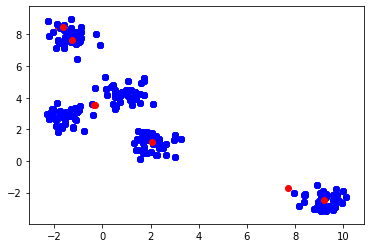

In [0]:
centeroids, clusterAssigned = cluster(X, k,centroids)


In [0]:
xRdd = spark.sparkContext.parallelize(X)
xRdd = xRdd.map(lambda x: [int(i) for i in x])
xRdd.collect()

Out[172]: [[1, 0],
 [-2, 8],
 [0, 4],
 [-1, 7],
 [2, 0],
 [0, 4],
 [-1, 2],
 [0, 4],
 [0, 2],
 [2, 0],
 [1, 3],
 [2, 0],
 [8, -2],
 [-1, 2],
 [0, 4],
 [1, 1],
 [-2, 2],
 [-1, 7],
 [-1, 7],
 [2, 1],
 [-1, 7],
 [-1, 2],
 [1, 4],
 [-1, 7],
 [8, -1],
 [2, 1],
 [-1, 8],
 [0, 7],
 [9, -2],
 [-1, 8],
 [2, 1],
 [-1, 1],
 [0, 3],
 [0, 4],
 [-1, 3],
 [1, 4],
 [9, -2],
 [-1, 7],
 [1, 1],
 [1, 4],
 [-1, 2],
 [1, 4],
 [0, 3],
 [2, 1],
 [9, -3],
 [9, -2],
 [9, -2],
 [3, 1],
 [2, 1],
 [0, 7],
 [0, 4],
 [1, 1],
 [-1, 8],
 [2, 0],
 [9, -2],
 [8, -3],
 [-2, 2],
 [-1, 7],
 [9, -2],
 [1, 1],
 [8, -2],
 [9, -2],
 [-1, 2],
 [0, 4],
 [-2, 3],
 [9, -2],
 [0, 3],
 [2, 0],
 [1, 1],
 [10, -2],
 [9, -2],
 [1, 1],
 [9, -2],
 [0, 4],
 [0, 5],
 [9, -3],
 [0, 3],
 [-1, 3],
 [-1, 2],
 [1, 1],
 [-1, 7],
 [-1, 6],
 [2, 1],
 [1, 1],
 [-1, 8],
 [-1, 7],
 [0, 4],
 [1, 3],
 [8, -2],
 [8, -2],
 [-1, 7],
 [9, -2],
 [0, 8],
 [-1, 7],
 [0, 4],
 [1, 4],
 [1, 0],
 [-1, 2],
 [8, -3],
 [0, 4],
 [0, 4],
 [-1, 2],
 [8, -2],
 [2, 0],
 [1, 1],
 [9, -2],
 [8, -2],
 [-1, 8],
 [0, 4],
 [-1, 2],
 [2, 1],
 [0, 4],
 [7, -2],
 [-2, 8],
 [-1, 3],
 [1, 0],
 [-1, 2],
 [0, 3],
 [-1, 3],
 [-1, 3],
 [9, -3],
 [1, 4],
 [9, -2],
 [0, 3],
 [1, 4],
 [-1, 2],
 [0, 4],
 [-1, 7],
 [2, 3],
 [-2, 2],
 [-1, 2],
 [1, 4],
 [0, 8],
 [1, 0],
 [-1, 7],
 [10, -1],
 [1, 5],
 [-1, 2],
 [9, -2],
 [9, -2],
 [2, 1],
 [9, -2],
 [-1, 2],
 [-2, 3],
 [-1, 8],
 [3, 1],
 [1, 0],
 [0, 8],
 [1, 0],
 [1, 5],
 [-1, 3],
 [-1, 8],
 [8, -2],
 [8, -2],
 [9, -1],
 [0, 4],
 [-2, 7],
 [-1, 2],
 [1, 3],
 [9, -2],
 [0, 7],
 [-1, 8],
 [-2, 3],
 [-1, 7],
 [2, 0],
 [-1, 3],
 [-1, 7],
 [-1, 8],
 [9, -2],
 [1, 3],
 [0, 3],
 [-1, 2],
 [0, 1],
 [2, 1],
 [1, 5],
 [-1, 8],
 [9, -2],
 [-1, 8],
 [-1, 7],
 [1, 1],
 [1, 0],
 [-1, 3],
 [1, 3],
 [-2, 2],
 [-1, 2],
 [1, 4],
 [-1, 3],
 [0, 4],
 [0, 7],
 [0, 7],
 [9, -2],
 [1, 1],
 [2, 0],
 [1, 1],
 [2, 1],
 [2, 1],
 [9, -1],
 [9, -2],
 [-1, 2],
 [-1, 7]]

In [0]:
xDf = xRdd.toDF(["x", "y"])

In [0]:
from pyspark.ml.feature import VectorAssembler

va = VectorAssembler(inputCols=["x","y"],outputCol="features")
xxDf = va.transform(xDf)
from pyspark.ml.clustering import KMeans

kmeans = KMeans(k=5)
model = kmeans.fit(xxDf)


2-3 답: 중심점 비교

In [0]:
print ("{비교} 2-1 중심점: ", centeroids,"{비교} 2-2 중심점: ",model.clusterCenters())

{비교} 2-1 중심점: [[ 2.05624581 1.17119214]
 [-1.62935885 8.46070761]
 [-0.34504918 3.54651993]
 [-1.25533937 7.64760382]
 [ 9.21059989 -2.47392331]] {비교} 2-2 중심점: [array([1.53658537, 0.63414634]), array([ 8.725, -2.025]), array([-0.875, 7.375]), array([-1.16666667, 2.30555556]), array([0.44186047, 3.79069767])]

3-1 답: 축구/ 야구 df 생성

In [0]:
import os
tdf  = spark\
        .read\
        .format('com.databricks.spark.csv')\
        .options(header='true', inferschema='true', delimiter=',')\
        .load(os.path.join('/FileStore/tables','all2-1.csv'))
tdf= tdf.na.drop()

In [0]:
from pyspark.ml.feature import Tokenizer
tokenizer = Tokenizer(inputCol="sen", outputCol="tokens")
tokDf = tokenizer.transform(tdf)

마침표 따옴표 제거 함수생성

In [0]:
import re
def trim(wordList):
  regex=re.compile("\d+")
  cleaned=list()
  for w in wordList:
    if not regex.match(w):
      cleaned.append(w.lstrip(" '").lstrip("*").rstrip("' ").rstrip(".").rstrip(",").replace("' ","").replace(" '",""))
  return cleaned

In [0]:
from pyspark.sql import functions as f
from pyspark.sql.types import ArrayType, StringType

trimUdf=f.udf(trim, ArrayType(StringType()))
wordsDf = tokDf.withColumn('words', trimUdf(f.col('tokens')))

3-2 답 : 불용어 제거, 숫자 단어 제거, 정리
(3-2와 3-7 같이 출력했습니다.)

In [0]:
from pyspark.ml.feature import StopWordsRemover

stop = StopWordsRemover(inputCol="words", outputCol="nostops")
stop.setStopWords([u"그러나", u"너", u"우리", u'나', u'*', u'저', u'그', u'이'])

Out[252]: StopWordsRemover_8234597eb0d3

3-7 답: 단어 빈도 출력 ( 미리 출력했습니다. )

In [0]:
stopDf.select("nostops")\
    .rdd\
    .flatMap(lambda x:x).flatMap(lambda x:x)\
    .map(lambda x: x.replace("페널티 킥","페널티킥"))\
    .map(lambda x: x.replace("헤딩 골","헤딩골"))\
    .map(lambda x:(x,1))\
    .reduceByKey(lambda x,y:x+y)\
    .map(lambda x:(x[1],x[0]))\
    .sortByKey(False)\
    .take(20)

Out[253]: [(9, '후반'),
 (9, '전반'),
 (8, '뒤'),
 (6, '수'),
 (6, 'lg는'),
 (5, '경기를'),
 (5, '이어'),
 (5, '있다'),
 (5, 'the'),
 (5, '초'),
 (5, '적시타로'),
 (5, '쿠에바스는'),
 (4, '"*'),
 (4, '페널티킥을'),
 (4, '같은'),
 (4, '첼시는'),
 (4, '더'),
 (4, '못했다'),
 (4, '득점'),
 (4, '이번')]

3-3 답 : tf-idf 계산

In [0]:
from pyspark.ml.feature import HashingTF, IDF

hashTF = HashingTF(inputCol="nostops", outputCol="features")

hashDf = hashTF.transform(stopDf)

idf = IDF(inputCol="features", outputCol="idf")

idfModel = idf.fit(hashDf)
idfDf = idfModel.transform(hashDf)
idfDf.select("cls","nostops", "features").show(5, truncate=False)

+----+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
cls |nostops |features |
+----+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
축구|["*, 페널티킥, 내준, 상황에, 대해선, ""여러, 나라를, 가봤지만, 우리나라, 심판, 수준에, 대해, 아쉽다, 앞으로, 그런, 부분이, 나오면, 안, 될, 듯하다""라고, 아쉬움을, 드러냈다."] |(262144,[951,8121,25882,37723,42715,59839,63579,75399,103335,120572,144420,159975,165050,165228,168718,171555,193770,201077,204684,227779,229687,250611],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]) |
축구|["찬스를, 놓치고, 페널티킥을, 내준, 상황에, 대해, ""선수들은, 최고의, 경기를, 보여줬다""고, 생각한다."] |(262144,[17393,82279,104390,145466,159975,163893,201077,205360,211078,218669,250611],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]) |
축구|[수원은, 후반, 막판, 공격, 상황에서, 상대의, 반칙이, 있었다는, 판단에, 따라, 온필드, 리뷰로, 페널티킥을, 얻었다, 이를, 안병준이, 침착하게, 성공시키며, 기적, 같은, 승격에, 성공했다]|(262144,[4736,10006,17477,18911,48643,92349,94324,96931,104390,124420,136735,142753,148874,154043,163245,165450,185174,191504,204915,208983,220433,259470],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])|
축구|[주심은, var, 끝에, 페널티, 킥을, 선언했고, 키커로, 나선, 안병준이, 침착하게, 차넣어, 득점에, 성공했다] |(262144,[2246,17306,33920,53106,81041,94324,107075,133319,148874,154043,168587,228947,248984],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]) |
축구|[전반, 박스, 안에서, 유려한, 드리블, 돌파를, 선보이며, 카일, 워커의, 페널티킥을, 이끌어냈다, 모하메드, 살라가, 키커로, 나서, 선제골로, 마무리했다] |(262144,[11346,45017,53106,75404,76171,87759,87812,97582,104390,117199,123211,143303,153988,172932,180785,190236,207852],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]) |
+----+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
only showing top 5 rows

3-4 답: 베이지안 모델 적용 ! 
3-5 답: train, test 셋 분리

In [0]:
from pyspark.ml.classification import NaiveBayes
nb=NaiveBayes(featuresCol='features', labelCol='label', modelType='multinomial', predictionCol='prediction')
(trainDf, testDf) = idfDf.randomSplit([0.75, 0.25])

In [0]:
model = nb.fit(trainDf)

3-5 답: train,test 정확성 평가 출력

In [0]:
predictions=model.transform(trainDf)
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator=BinaryClassificationEvaluator(rawPredictionCol="prediction", labelCol="label")
evaluator.evaluate(predictions)
print("test 정확성")
evaluator.evaluate(predictions)


test 정확성
Out[282]: 1.0

In [0]:
predictions=model.transform(testDf)
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator=BinaryClassificationEvaluator(rawPredictionCol="prediction", labelCol="label")
print("test 정확성")
evaluator.evaluate(predictions)

test 정확성
Out[284]: 0.8333333333333334

3-6 못풀었습니다.